In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
!wget https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz
!wget https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz
!gzip -d plasticc_train_lightcurves.csv.gz
!gzip -d plasticc_train_metadata.csv.gz
!mv plasticc_train_lightcurves.csv ../Data
!mv plasticc_train_metadata.csv ../Data

--2021-04-18 16:01:09--  https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21553100 (21M) [application/octet-stream]
Saving to: ‘plasticc_train_lightcurves.csv.gz’

plasticc_train_ligh 100%[===================>]  20,55M  19,7MB/s    in 1,0s    

2021-04-18 16:01:11 (19,7 MB/s) - ‘plasticc_train_lightcurves.csv.gz’ saved [21553100/21553100]

--2021-04-18 16:01:11--  https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 370350 (362K) [application/octet-stream]
Saving to: ‘plasticc_train_metadata.csv.gz’

plasticc_train_meta 100%[===================>] 361,67K  1,58MB/s    in 0,2s    

2021-04-18 16:01

In [27]:
DATA_DIR = "../Data/"

In [43]:
class LightCurve():
    _pbnames = ['u','g','r','i','z','y']
    _cad_num = {"low":0, "high":1}
    
    def __init__(self, csv_file, cadence="low"):
        raw_data = pd.read_csv(os.path.join(DATA_DIR, csv_file))
        self.cadence = cadence
        self.light_curves = raw_data[raw_data["detected_bool"]==self._cad_num[cadence]]
        
        self.unique_ids = self.light_curves['object_id'].unique()
        self.ids = {_id: self.unique_ids[_id] for _id in np.arange(len(self.unique_ids)) }
   
    def show_lightcurves_by_id(self, _id, band="all"):
        object_id = self.ids[_id]
        curves = self.light_curves[self.light_curves['object_id']==object_id]
        if band != "all":
            index_band = self._pbnames.index(band)
            curve_in_band = curves[curves['passband']==index_band]
            curve_x = curve_in_band['mjd'].values
            curve_y = curve_in_band['flux'].values
            plt.scatter(curve_x, curve_y)
            plt.title(f"{object_id=}")
            plt.show()
            return
        
        for index_band in range(len(self._pbnames)):
            curve_in_band = curves[curves['passband']==index_band]
            curves_x = curve_in_band['mjd'].values
            curves_y = curve_in_band['flux'].values
            plt.scatter(curves_x, curves_y)
            plt.title(f"{object_id=}")
        plt.show()
        return
    
    def get_matrix_lightcurve(self, _id, band="u", band_height=100):
        object_id = self.ids[_id]
        curves = self.light_curves[self.light_curves['object_id']==object_id]
        k = 6 if band=="all" else 1
        if self.cadence == "high":
            data = np.zeros((k*band_height,501))
        elif self.cadence == "low":
            data = np.zeros((k*band_height,901))
        
        if band != "all":
            index_band = self._pbnames.index(band)
            curve = self.light_curves[self.light_curves['object_id']==object_id]
            data_band = curve[curve["passband"]==index_band][['mjd','flux']].values
        
            data_band[:,0] -= data_band[:,0].min()
            data_band[:,0] = np.round(data_band[:,0])

            for i in range(band_height):
                data[i][data_band[:,0].astype(int)] = data_band[:,1]
            return data
        
        
        for index_band in range(len(self._pbnames)):
            curve = self.light_curves[self.light_curves['object_id']==object_id]
            data_band = curve[curve["passband"]==index_band][['mjd','flux']].values
            if len(data_band)==0: 
                continue
            data_band[:,0] -= data_band[:,0].min()
            data_band[:,0] = np.round(data_band[:,0])
            for m in np.arange(index_band*band_height, band_height*(index_band+1)):
                data[m][data_band[:,0].astype(int)] = data_band[:,1]
                
        return data

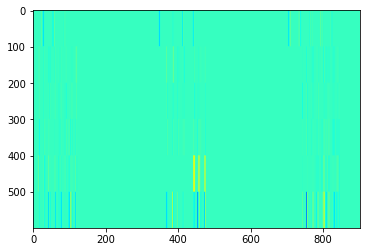

In [44]:
lc = LightCurve("plasticc_train_lightcurves.csv", "low")
data = lc.get_matrix_lightcurve(200, "all")
plt.imshow(data, cmap='jet')

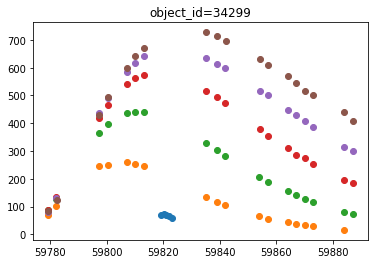

In [62]:
lc = LightCurve("plasticc_train_lightcurves.csv", "high")
lc.show_lightcurves_by_id(200)

In [63]:
data = pd.read_csv(os.path.join(DATA_DIR, "plasticc_train_data.csv"))

FileNotFoundError: [Errno 2] File b'../plastic_data/plasticc_train_data.csv' does not exist: b'../plastic_data/plasticc_train_data.csv'

In [64]:
data

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,...,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,...,0.0,0.000,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,...,0.0,0.000,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,...,0.0,0.000,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,...,0.0,0.000,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,...,0.0,0.000,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0
5,1227,35.6836,-5.3794,1,0.000,0.000,0.000,-9.000,0.020,65,...,0.0,0.000,59570.000,47,2.3,11.6,31.6,240.0,632.4,1187.7
6,1598,347.8467,-64.7609,1,0.135,0.182,0.030,39.728,0.019,90,...,0.0,0.000,60628.816,20,0.0,0.0,0.0,0.0,0.0,0.0
7,1632,348.5959,-63.0726,1,0.686,0.701,0.010,43.152,0.021,42,...,3.1,0.051,59602.090,93,0.0,0.0,0.0,0.0,0.0,0.0
8,1920,149.4141,3.4338,1,0.309,0.323,0.336,41.140,0.027,90,...,0.0,0.000,59996.625,107,0.0,0.0,0.0,0.0,0.0,0.0
9,1926,149.4141,1.9401,1,0.000,0.000,0.000,-9.000,0.018,65,...,0.0,0.000,59570.000,15,16.6,130.6,450.4,2237.3,4903.2,8229.6
